<img src="antiporter3.png" width="800" height="600" />

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Antiporter Model 3 simulation
def antiporter3(x,t):
    '''
    input x(t) populations and time
    output dxdt
    '''
    
    # state populations 
    OF_Ab_Bb = x[0]
    OF_Ab = x[1]
    IF_Ab = x[2]
    IF = x[3]
    IF_Bb = x[4]
    OF_Bb = x[5]
    
    # species populations (molec.)
    a_out = x[6]
    a_in = x[7]
    b_out = x[8]
    b_in = x[9]
    
    # rate constants (molec.)
    k_a_on = 16.61 # H+  
    k_a_off = 1e6  # H+

#     k_a_on = 2.3e-5 # Na+  
#     k_a_off = 300  # Na+

    k_b_on = 16.61e-5 
    k_b_off = 1e4

    k_conf = 1
    
    # antiporter ODEs
    # OF_Ab_Bb
    d1dt = OF_Bb*a_out*k_a_on + OF_Ab*b_out*k_b_on - OF_Ab_Bb*k_b_off - OF_Ab_Bb*k_a_off
    
    # OF_Ab
    d2dt = OF_Ab_Bb*k_b_off + IF_Ab*k_conf - OF_Ab*k_conf - OF_Ab*b_out*k_b_on
    
    # IF_Ab
    d3dt = OF_Ab*k_conf + IF*a_in*k_a_on - IF_Ab*k_conf - IF_Ab*k_a_off
    
    # IF
    d4dt = IF_Ab*k_a_off + IF_Bb*k_b_off - IF*a_in*k_a_on - IF*b_in*k_b_on
    
    # IF_Bb
    d5dt = OF_Bb*k_conf + IF*b_in*k_b_on - IF_Bb*k_conf - IF_Bb*k_b_off
    
    # OF_Bb
    d6dt = OF_Ab_Bb*k_a_off + IF_Bb*k_conf - OF_Bb*k_conf - OF_Bb*a_out*k_a_on
    
    # A_out
    d7dt = OF_Ab_Bb*k_a_off - OF_Bb*a_out*k_a_on 
    
    # A_in
    d8dt = IF_Ab*k_a_off - IF*a_in*k_a_on
    
    # B_out
    d9dt = OF_Ab_Bb*k_b_off - OF_Ab*b_out*k_b_on 
    
    # B_in
    d10dt = IF_Bb*k_b_off - IF*b_in*k_b_on
    
    return [d1dt, d2dt, d3dt, d4dt, d5dt, d6dt, d7dt, d8dt, d9dt, d10dt]
    
# intial state populations
OF_Ab_Bb_0 = 1  # molec.
OF_Ab_0 = 0
IF_Ab_0 = 0
IF_0 = 0
IF_Bb_0 = 0
OF_Bb_0 = 0

# intial species populations
a_out_0 = 240  # molec.
a_in_0 = 0
b_out_0 = 48
b_in_0 = 72
x_0 = [OF_Ab_Bb_0, OF_Ab_0, IF_Ab_0, IF_0, IF_Bb_0, OF_Bb_0, a_out_0, a_in_0, b_out_0, b_in_0]

    # rate constants (molec.)
k_a_on = 16.61 # H+  
k_a_off = 1e6  # H+

#     k_a_on = 2.3e-5 # Na+  
#     k_a_off = 300  # Na+

k_b_on = 16.61e-5 
k_b_off = 1e4

k_conf = 1

# ODE integration time steps
t_0 = 0
t_f = int(5e8)
t_n = int(5e5)
t = np.linspace(t_0,t_f,t_n)

# ODE integration
x = odeint(antiporter3, x_0, t)

# integration output
OF_Ab_Bb = x[:,0]
OF_Ab = x[:,1]
IF_Ab = x[:,2]
IF = x[:,3]
IF_Bb = x[:,4]
OF_Bb = x[:,5]
a_out = x[:,6]
a_in = x[:,7]
b_out = x[:,8]
b_in = x[:,9]

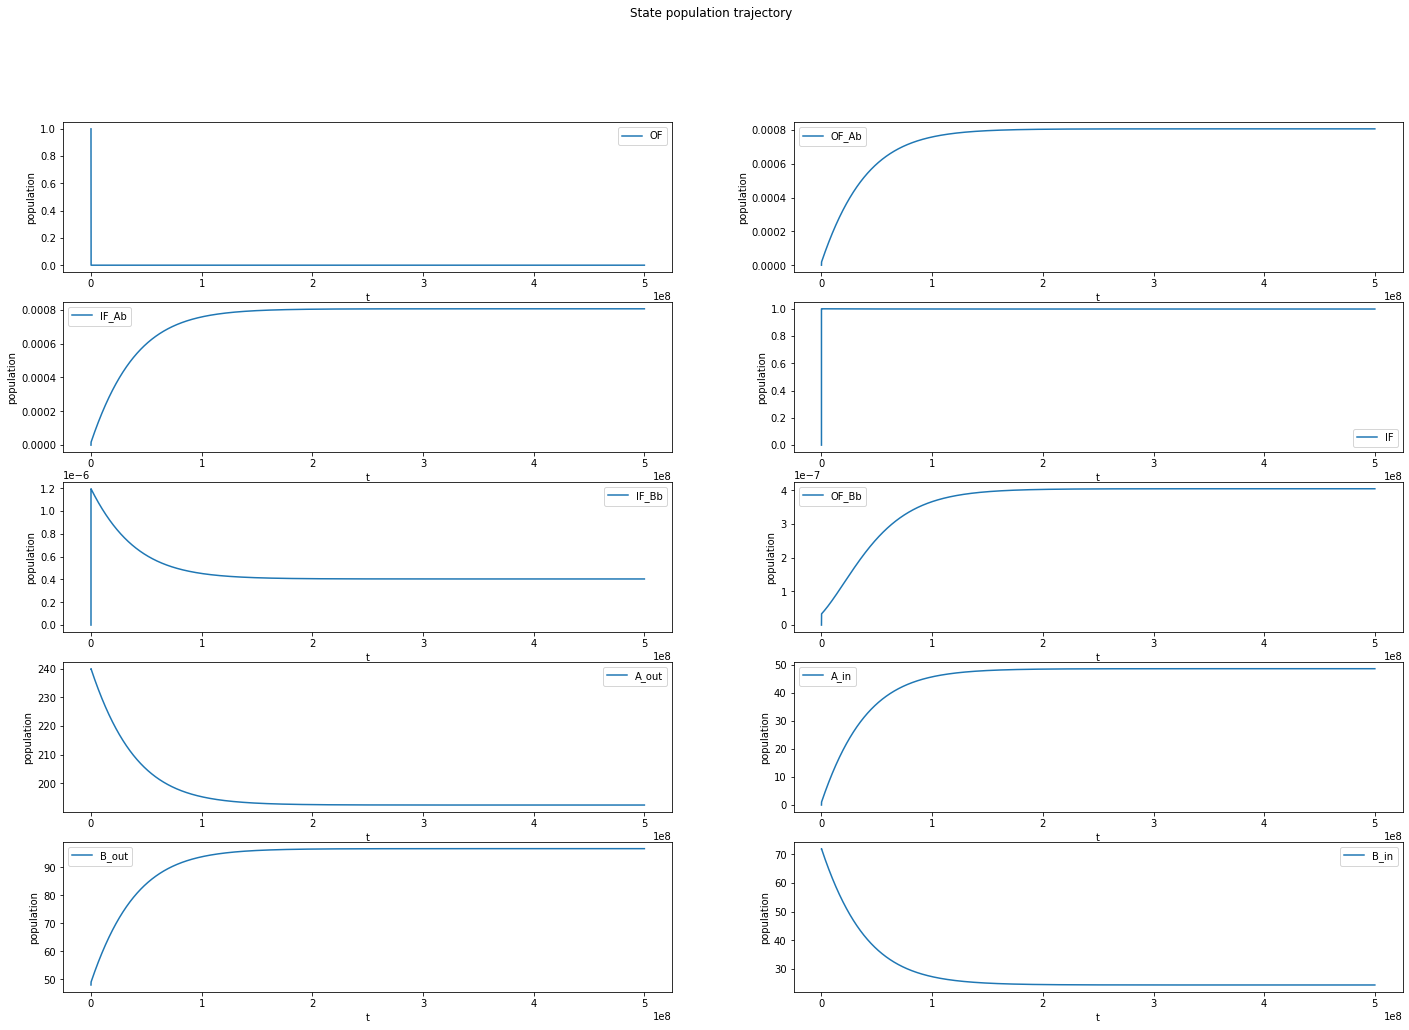

In [19]:
# graph population trajectories

fig, axs = plt.subplots(5, 2,figsize=(24,16))
plt.suptitle('State population trajectory')

axs[0, 0].plot(t, OF_Ab_Bb, label='OF')
axs[0, 0].legend()
axs[0, 1].plot(t, OF_Ab, label='OF_Ab')
axs[0, 1].legend()
axs[1, 0].plot(t, IF_Ab, label='IF_Ab')
axs[1, 0].legend()
axs[1, 1].plot(t, IF, label='IF')
axs[1, 1].legend()
axs[2, 0].plot(t, IF_Bb, label='IF_Bb')
axs[2, 0].legend()
axs[2, 1].plot(t, OF_Bb, label='OF_Bb')
axs[2, 1].legend()
axs[3, 0].plot(t, a_out, label='A_out')
axs[3, 0].legend()
axs[3, 1].plot(t, a_in, label='A_in')
axs[3, 1].legend()
axs[4, 0].plot(t, b_out, label='B_out')
axs[4, 0].legend()
axs[4, 1].plot(t, b_in, label='B_in')
axs[4, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='t', ylabel='population')

5.076562068395858e-13
5.075984120875288e-13
2.2737367544323206e-13
5.076572842654947e-13
5.076564692609808e-13
5.076562000633222e-13


[Text(0.5, 0, 't'), Text(0, 0.5, 'flux ')]

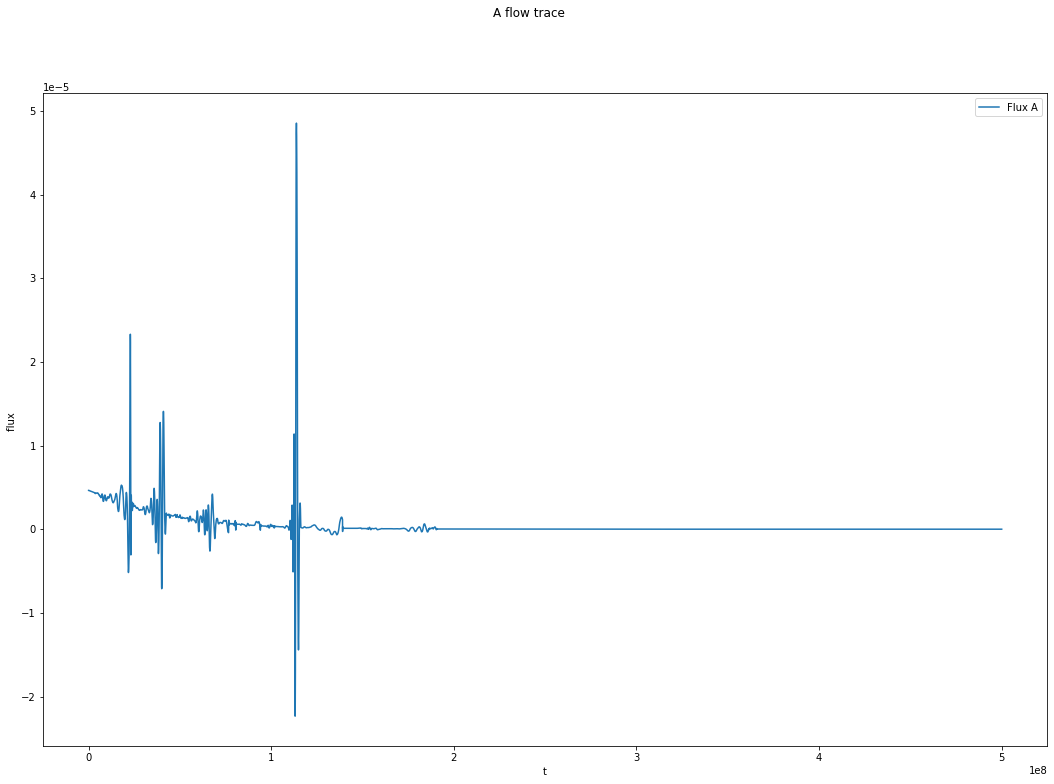

In [20]:
# calc and graph net flow

# OF_Ab_Bb -> OF_Ab
j_12 = OF_Ab_Bb*k_b_off
j_21 = OF_Ab*b_out*k_b_on
j1 = j_12 - j_21

# OF_Ab -> IF_Ab
j_23 = OF_Ab*k_conf
j_32 = IF_Ab*k_conf
j2 = j_23 - j_32

# IF_Ab -> IF
j_34 = IF_Ab*k_a_off
j_43 = IF*a_in*k_a_on
j3 = j_34 - j_43

# IF -> IF_Bb
j_45 = IF*b_in*k_b_on
j_54 = IF_Bb*k_b_off
j4 = j_45 - j_54

# IF_Bb -> OF_Bb
j_56 = IF_Bb*k_conf
j_65 = OF_Bb*k_conf
j5 = j_56 - j_65

# OF_Bb -> OF_Ab_Bb
j_61 = OF_Bb*a_out*k_a_on
j_16 = OF_Ab_Bb*k_a_off
j6 = j_61 - j_16

print(j1[-1])
print(j2[-1])
print(j3[-1])
print(j4[-1])
print(j5[-1])
print(j6[-1])

# A flux pathway
j_A = np.asarray(j6+j1 + j2 + j3)

fig, axs = plt.subplots(1, 1,figsize=(18,12))
plt.suptitle('A flow trace')

axs.plot(t[1:], j_A[1:], label='Flux A')
axs.legend()
axs.set(xlabel='t', ylabel='flux ')

In [21]:
np.savetxt('J_A_3_weak.csv', j_A, delimiter=',')

[Text(0.5, 0, 't'),
 Text(0, 0.5, 'flux '),
 (-0.001, 0.005),
 (-1.0, 100000000.0)]

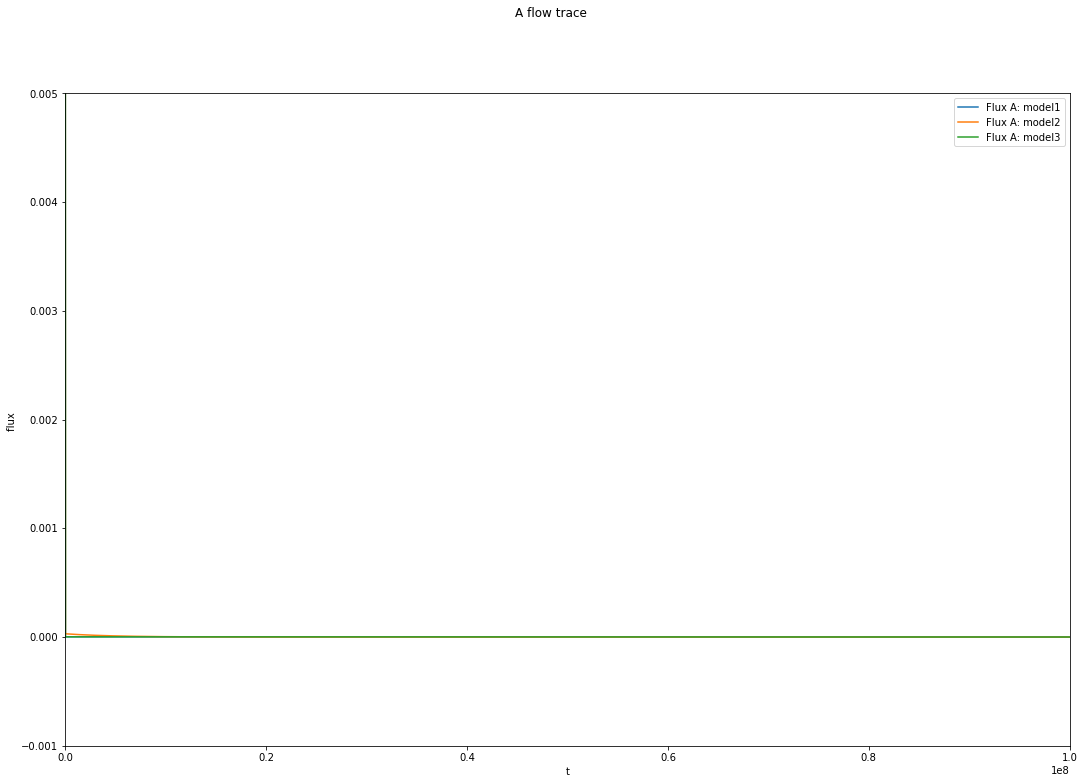

In [9]:
j_A_1 = np.genfromtxt('J_A_1.csv',delimiter=',' )
j_A_2 = np.genfromtxt('J_A_2.csv',delimiter=',' )

fig, axs = plt.subplots(1, 1,figsize=(18,12))
plt.suptitle('A flow trace')


axs.plot(t, j_A_1, label='Flux A: model1')
axs.plot(t, j_A_2, label='Flux A: model2')
axs.plot(t, j_A, label='Flux A: model3')
axs.legend()
axs.set(xlabel='t', ylabel='flux ', ylim=(-0.001,0.005), xlim=(-1, 1e8))

[Text(0.5, 0, 't'),
 Text(0, 0.5, 'flux '),
 (-0.0001, 0.0005),
 (-1.0, 100000000.0)]

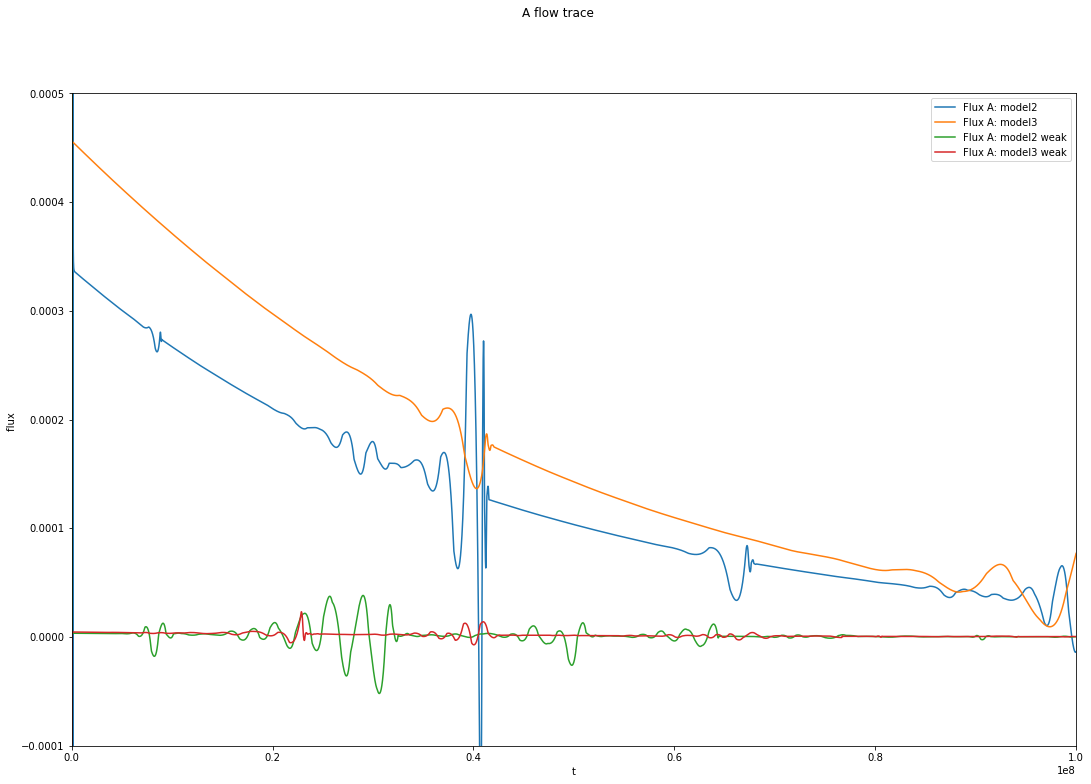

In [23]:
j_A_2_norm = np.genfromtxt('J_A_2_norm.csv',delimiter=',' )
j_A_3_norm = np.genfromtxt('J_A_3_norm.csv',delimiter=',' )
j_A_2_weak = np.genfromtxt('J_A_2_weak.csv',delimiter=',' )
j_A_3_weak = np.genfromtxt('J_A_3_weak.csv',delimiter=',' )



fig, axs = plt.subplots(1, 1,figsize=(18,12))
plt.suptitle('A flow trace')


axs.plot(t, j_A_2_norm, label='Flux A: model2')
axs.plot(t, j_A_3_norm, label='Flux A: model3')
axs.plot(t, j_A_2_weak, label='Flux A: model2 weak')
axs.plot(t, j_A_3_weak, label='Flux A: model3 weak')
axs.legend()
axs.set(xlabel='t', ylabel='flux ', ylim=(-0.0001,0.0005), xlim=(-1, 1e8))